In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Esercitazione 9 _ Bonato Angela

L'esercitazione richiedeva di scrivere un algoritmo genetico (GA) e utilizzarlo per risolvere il problema del commesso viaggiatore su due diversi set da $N_C=34$ città ciascuno.

Dopo aver generato le città da utilizzare, ho associato a ciascuna un numero intero in modo da poter codificare ogni cromosoma (i.e., possibile soluzione al problema analizzato) con un vettore di interi. Perchè un vettore di interi fosse considerato un cromosoma valido, doveva contenere tutte e sole le lables identificative delle città, ripetute una sola volta, ad eccezione della prima (città $0$) che doveva essere anche l'ultima del vettore (in modo da avere un percorso chiuso). 

Ogni volta che una popolazione (un insieme di $N_P$ cromosomi) veniva costituita, per ogni suo membro valutavo la funzione costo $L^{(1)}$ che, mediante il metodo suggerito dal professore basato sull'ordinamento, permetteva di selezionare cromosomi per il crossover con probabilità inversamente proporzionale al loro costo. La selezione, dunque l'applicazione degli operatori di crossover e mutazione, veniva effettuata $N_P/2$ volte, fino a costruire un'intera nuova popolazione su cui ripetevo il processo. Ad ogni generazione, cioè ad ogni nuova popolazione analizzata, ho tenuto traccia del valore più basso assunto da $L^{(1)}$ su tutti i membri in esame, nonchè di valor medio e deviazione standard della funzione costo calcolata sulla metà migliore (in termini di costo) della popolazione corrente. Ho inoltre tenuto memorizzato il percorso che su tutte le $N_G$ generazioni esaminate è risultato quello caratterizzato dal minimo costo, in modo da poter fornire una soluzione al problema posto.

L'operatore di crossover che ho implementato nel programma segue l'esempio fornito nella consegna dell'esercizio e per la sua applicazione ho fissato una probabilità pari al $60\%$. Per l'operatore di mutazione, invece, ho operato qualche modifica. Con probabilità fissate tutte entro il $10\%$, ad ogni cromosoma appena generato tramite crossover (eventualmente identico ad un genitore, in caso di crossover non avvenuto) ho applicato $4$ mutazioni, tutte che coinvolgevano solo i geni (città nel percorso) fra il secondo e il penultimo in modo da mantenere cromosomi validi:
 1. scelti due geni randomicamente, questi vengono scambiati;
 2. il gruppo dei primi $m$ geni trasla in avanti di $n$ posti (con $n$ e $m$ estratti randomicamente);
 3. estratto un numero casuale $m$, viene scambiato un gruppo di $m$ geni nella prima metà del cromosoma con un gruppo analogo presente nella seconda metà;
 4. estratta una posizione $n$, viene invertito l'ordine all'interno di un gruppo di $m$ geni a partire da essa (sempre con $n$ e $m$ estratti dal generatore random).

Seguono i grafici relativi alle funzioni di costo e ai percorsi ottimali trovati nei due casi analizzati, accompagnati da alcune osservazioni specifiche. Una annotazione generale riguarda il fatto che ho riscontrato che la funzione costo ottimale diminuiva molto di più se fra un'esecuzione del programma e l'altra aumentavo $N_P$ piuttosto che $N_G$. Per fissare questi parametri e dunque decidere un criterio per fermare l'algoritmo, ho guardato il costo del percorso migliore fra diverse esecuzioni: quando non diminuiva neanche raddoppiando la dimensione di ogni popolazione e il numero di generazioni, ho assunto di aver raggiunto un minimo - almeno locale - di $L^{(1)}$ da cui il programma non riusciva ad uscire e quindi di aver trovato la miglior soluzione per il mio codice.

## Città lungo una circonferenza

Il primo caso affronta il problema del commesso viaggiatore per città posizionate randomicamente lungo una circonferenza di raggio $r=1$. Per questo specifico problema è evidente che il percorso ottimale segua il più possibile fedelmente la circonferenza, senza entrare al suo interno per effettuare incroci. Di conseguenza, è immediato constatare che la soluzione trovata è effettivamente la migliore e che l'algoritmo funziona correttamente. 

Dai grafici di costo plottati si nota come già prima della metà delle generazioni la soluzione è stata trovata e mantenuta, la diminuzione della deviazione standard sul costo medio di metà popolazione è indice del fatto che man mano tutti i cromosomi sono diventati più e più simili all'individuo migliore. 

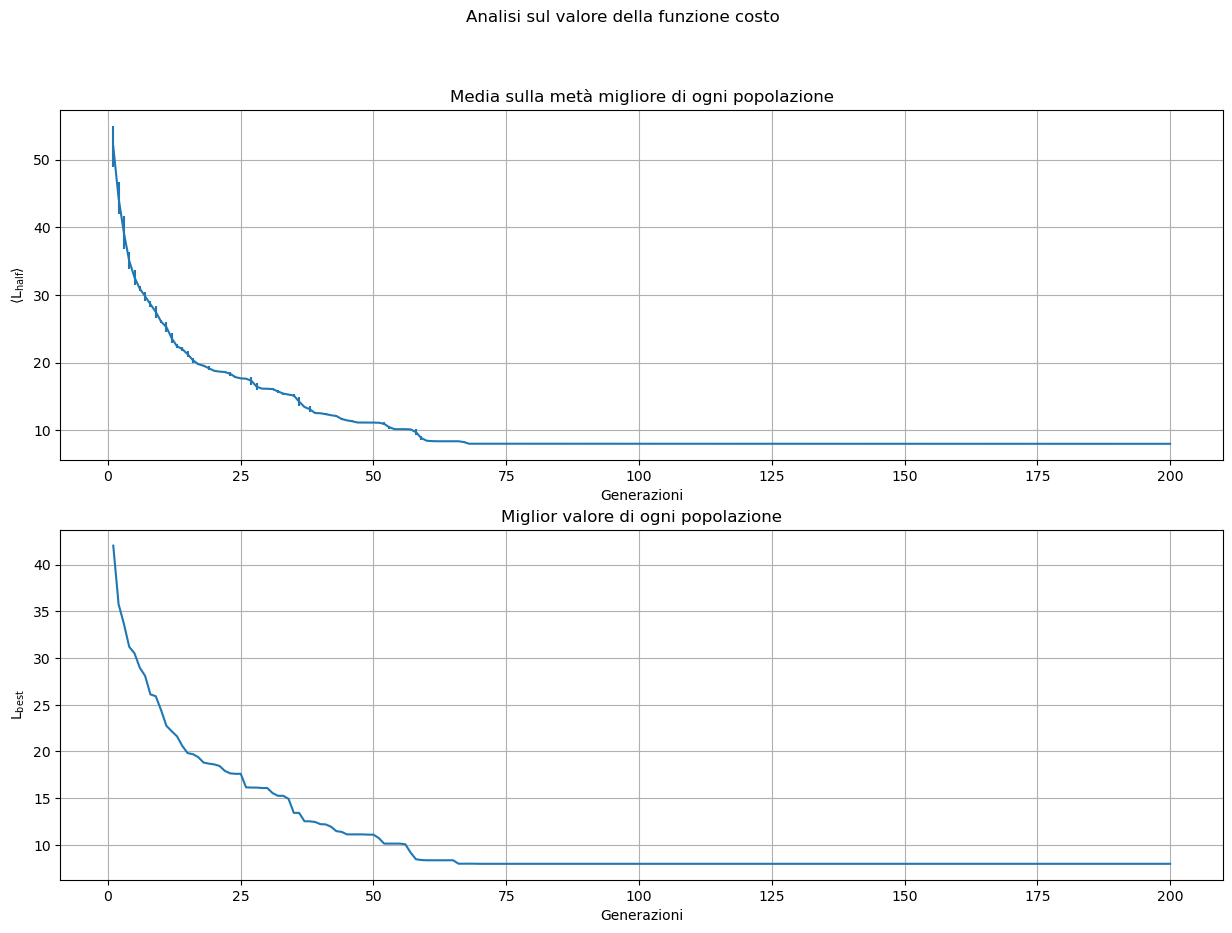

In [2]:
cNstep=200  #numero di generazioni
cx=np.arange(cNstep)+1  #vettore delle ascisse dei punti plottati

#costo percorso migliore a ogni generazione
cbestL=np.loadtxt("cbestloss.dat",  unpack="true")
#costo medio dei primi individui a ogni generazione con dev standard
cmeanL, cerrorsL=np.loadtxt("cbesthalfloss.dat", usecols=(0, 1),  unpack="true")  

cfig ,(cplt1, cplt2) = plt.subplots(2, 1, figsize=(15, 10))

cplt1.errorbar(cx, cmeanL, yerr=cerrorsL)
cplt1.set_xlabel("Generazioni")
cplt1.set_ylabel(r"$\left<\mathrm{L_{half}}\right>$")
cplt1.set_title("Media sulla metà migliore di ogni popolazione")
cplt1.grid(True)

cplt2.plot(cx, cbestL)
cplt2.set_xlabel("Generazioni")
cplt2.set_ylabel(r"$\mathrm{L_{best}}$")
cplt2.set_title("Miglior valore di ogni popolazione")
cplt2.grid(True)

cfig.suptitle("Analisi sul valore della funzione costo")
plt.show()

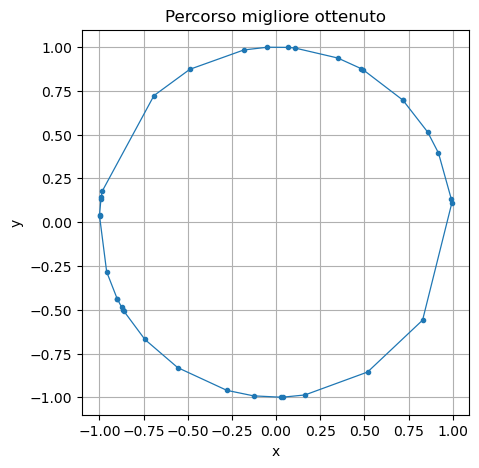

In [3]:
#plot del percorso migliore in assoluto
cpathx, cpathy=np.loadtxt("cbestpath.dat", usecols=(0, 1),  unpack="true")

plt.figure(figsize=(5, 5))
plt.plot(cpathx, cpathy, marker='.', linewidth=0.9)
plt.grid()
plt.title("Percorso migliore ottenuto")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Città in un quadrato

In seguito ho risolto il caso con le città disposte randomicamente in un quadrato di lato $l=1$. Ora il percorso migliore non è immediato da determinare, dunque è più difficile giudicare la soluzione trovata. Il cromosoma ottimale ottenuto non presenta incroci e ciò, unito all'andamento decrescente fino ad un plateau stabile della funzione costo, sia mediata che migliore, suggerisce che l'algoritmo abbia lavorato correttamente; non c'è un modo però di stabilire in maniera certa se il minimo di $L^{(1)}$ raggiunto sia globale o locale. La maggior complessità di questo problema rispetto al problema precedente, sebbene $N_C$ resti costante, è testimoniata anche dal maggior numero di generazioni richieste dall'algoritmo per convergere stabilmente ad una soluzione.

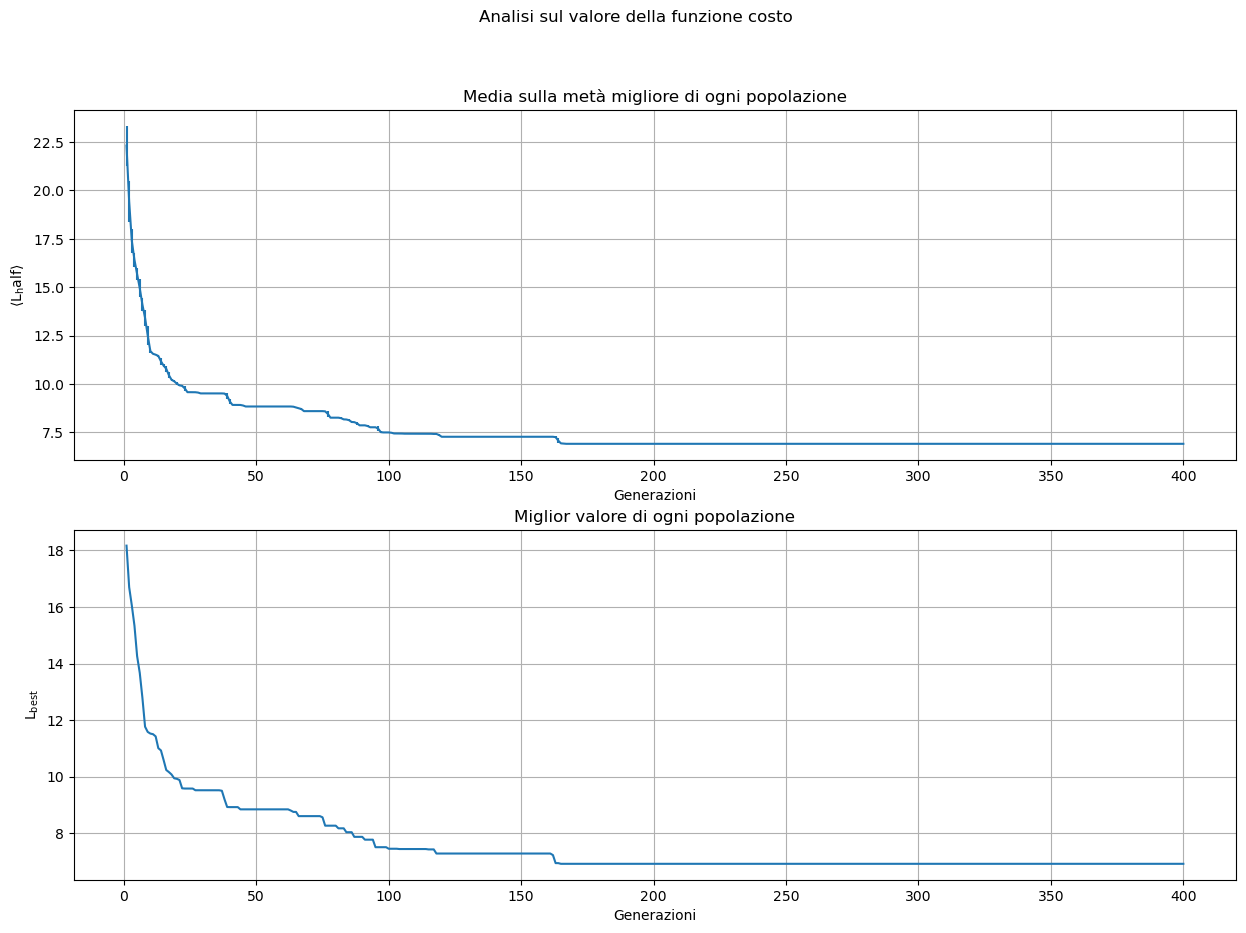

In [6]:
sNstep=400  #numero di generazioni
sx=np.arange(sNstep)+1  #vettore delle ascisse dei punti plottati

#costo percorso migliore a ogni generazione
sbestL=np.loadtxt("sbestloss.dat",  unpack="true")
#costo medio dei primi individui a ogni generazione con dev standard
smeanL, serrorsL=np.loadtxt("sbesthalfloss.dat", usecols=(0, 1),  unpack="true")  

sfig ,(splt1, splt2) = plt.subplots(2, 1, figsize=(15, 10))

splt1.errorbar(sx, smeanL, yerr=serrorsL)
splt1.set_xlabel("Generazioni")
splt1.set_ylabel(r"$\left<\mathrm{L_half}\right>$")
splt1.set_title("Media sulla metà migliore di ogni popolazione")
splt1.grid(True)

splt2.plot(sx, sbestL)
splt2.set_xlabel("Generazioni")
splt2.set_ylabel(r"$\mathrm{L_{best}}$")
splt2.set_title("Miglior valore di ogni popolazione")
splt2.grid(True)

sfig.suptitle("Analisi sul valore della funzione costo")
plt.show()

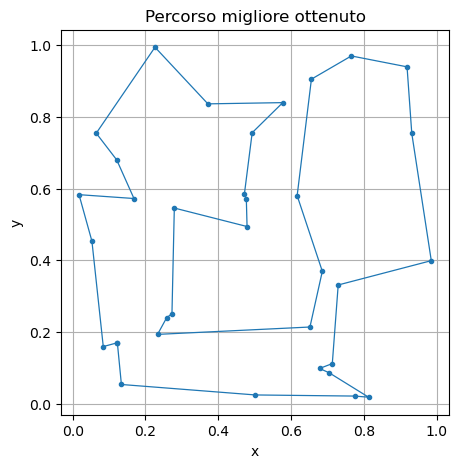

In [7]:
#miglior percorso in assoluto
spathx, spathy=np.loadtxt("sbestpath.dat", usecols=(0, 1),  unpack="true")

plt.figure(figsize=(5, 5))
plt.plot(spathx, spathy, marker='.', linewidth=0.9)
plt.grid()
plt.title("Percorso migliore ottenuto")
plt.xlabel("x")
plt.ylabel("y")
plt.show()